In [36]:
pip install scikit-learn

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
# Load dataset Iris
iris = datasets.load_iris()
X = iris.data  # Fitur
y = iris.target  # Label

In [39]:
# Mengonversi data menjadi DataFrame untuk EDA
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

In [40]:
# Eksplorasi Data (EDA)
# 1. Deskripsi statistik
print("\nDeskripsi Statistik:")
print(df.describe())


Deskripsi Statistik:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


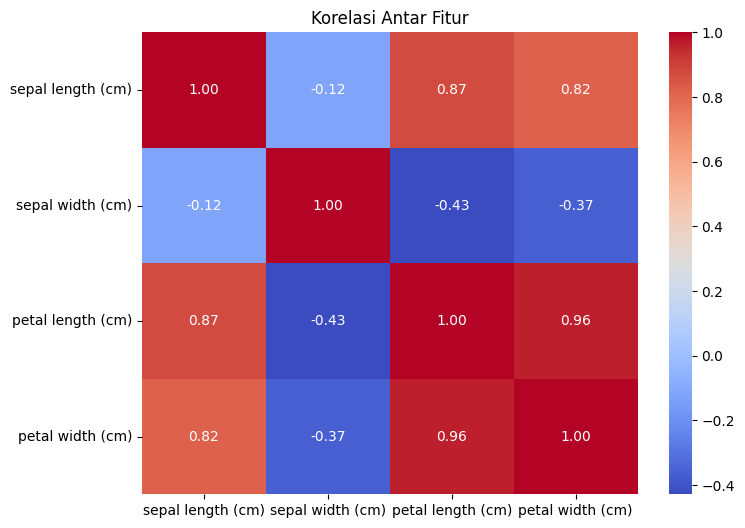

In [41]:
# 3. Korelasi antar fitur
plt.figure(figsize=(8,6))
sns.heatmap(df[iris.feature_names].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

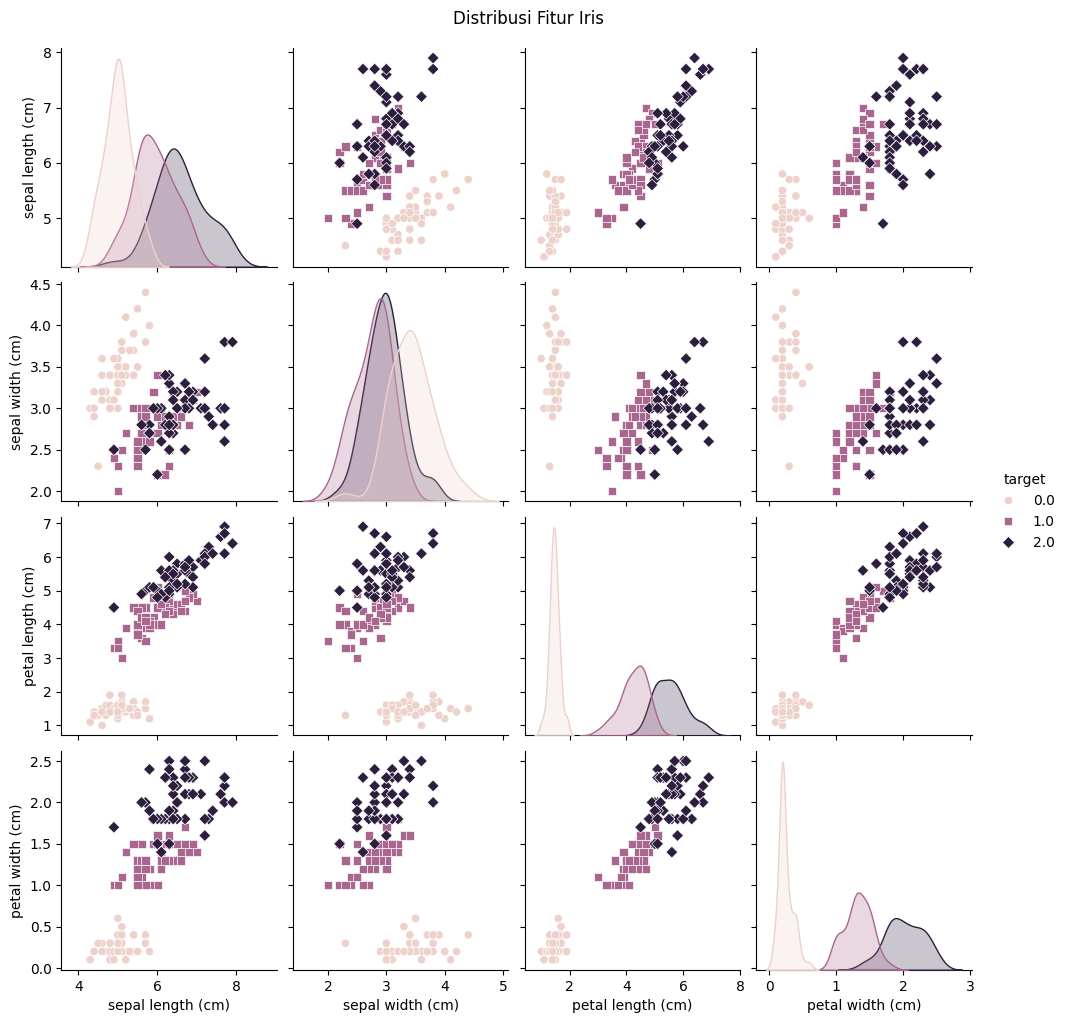

In [42]:
# Visualisasi distribusi fitur
sns.pairplot(df, hue="target", markers=["o", "s", "D"])
plt.suptitle("Distribusi Fitur Iris", y=1.02)
plt.show()

In [43]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Inisialisasi model K-Nearest Neighbors (KNN)
k = 5  # Jumlah tetangga
model = KNeighborsClassifier(n_neighbors=k)

In [46]:
# Latih model dengan data training
model.fit(X_train, y_train)  # Pastikan fit dipanggil sebelum predict

KNeighborsClassifier()

In [47]:
# Prediksi dengan data testing
y_pred = model.predict(X_test)

In [48]:
# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAkurasi model: {accuracy * 100:.2f}%')


Akurasi model: 100.00%


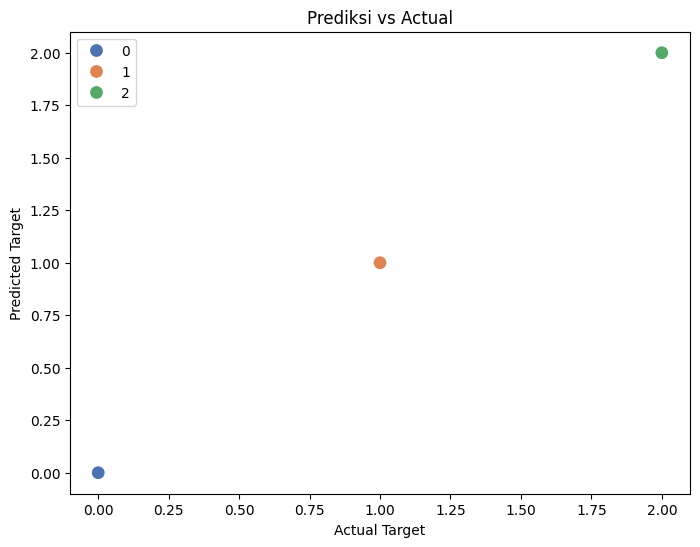

In [49]:
# Visualisasi prediksi vs actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test, palette="deep", marker='o', s=100)
plt.title('Prediksi vs Actual')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.show()